Task - 4 : Restaurant Chains

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("Dataset .csv")

df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

1. Identify if there are any restaurant chains
present in the dataset.

In [3]:
ch = df[df.duplicated('Restaurant Name',keep=False)]

ch_groups = ch.groupby('Restaurant Name')

In [4]:
if not ch.empty:
    print("Restaurant Chains in the Dataset:")
    print(ch[['Restaurant Name']].value_counts())
else:
    print("No restaurant chains found in the dataset.")

Restaurant Chains in the Dataset:
Restaurant Name 
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Gullu's              2
Gulab                2
Grover Sweets        2
Grillz               2
bu��no               2
Name: count, Length: 734, dtype: int64


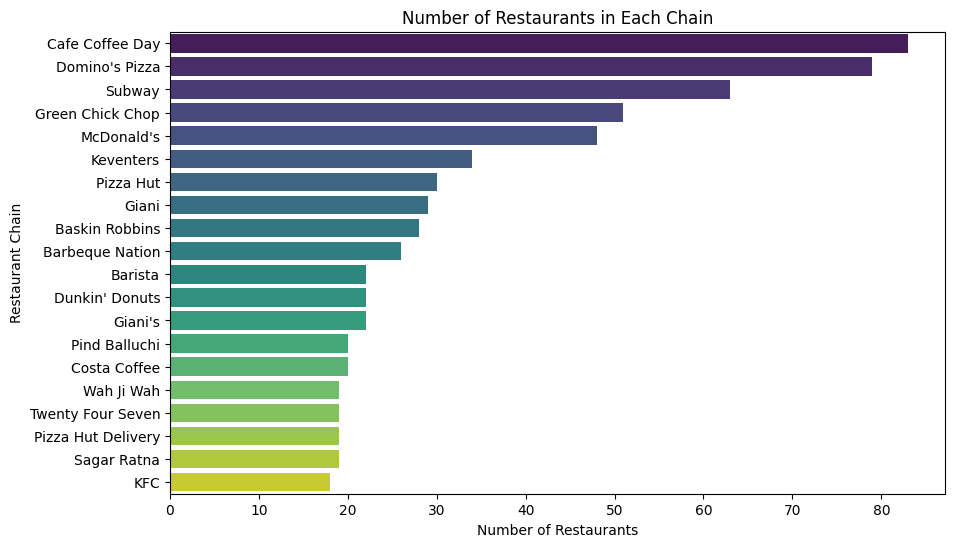

In [19]:
chain_counts = ch_groups.size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=chain_counts.head(20).values, y=chain_counts.head(20).index, hue=chain_counts.head(20).index, palette='viridis', legend=False)

# Title and labels

plt.title('Number of Restaurants in Each Chain')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Chain')

plt.show()

2. Analyze the ratings and popularity of
different restaurant chains.

In [ ]:
chains = df[df.duplicated('Restaurant Name', keep=False)]
chain_groups = chains.groupby('Restaurant Name')


In [ ]:
average_ratings = chain_groups['Aggregate rating'].mean()

In [ ]:
average_ratings.sort_values(ascending=False)

Restaurant Name
Talaga Sampireun                   4.900
Silantro Fil-Mex                   4.850
AB's Absolute Barbecues            4.850
AB's - Absolute Barbecues          4.825
Naturals Ice Cream                 4.800
                                   ...  
Big Biryani                        0.000
Flavours Kitchen                   0.000
Anand Sweets                       0.000
Radha Swami Shudh Vaishno Dhaba    0.000
OCD - Online Cake Delivery         0.000
Name: Aggregate rating, Length: 734, dtype: float64

In [ ]:
total_votes = chain_groups['Votes'].sum()


In [ ]:
total_votes.sort_values(ascending=False)

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Big Chill                    10853
Farzi Cafe                   10098
Truffles                      9682
                             ...  
Bikaner Misthan Bhandar          0
Aap Ki Khatir                    0
Street Cafe                      0
Jyoti Sweets                     0
Firangi Bake                     0
Name: Votes, Length: 734, dtype: int64

In [ ]:
chain_analysis = pd.DataFrame({
    'Average Rating': average_ratings,
    'Total Votes': total_votes
})


In [ ]:
# Sort by average rating or total votes
sorted_chain_analysis = chain_analysis.sort_values(by='Average Rating', ascending=False)

# Display the results
print("Sorted Chain Analysis by Average Rating:")
print(sorted_chain_analysis)


Sorted Chain Analysis by Average Rating:
                                 Average Rating  Total Votes
Restaurant Name                                             
Talaga Sampireun                          4.900         5514
Silantro Fil-Mex                          4.850         1364
AB's Absolute Barbecues                   4.850         3151
AB's - Absolute Barbecues                 4.825        13400
Naturals Ice Cream                        4.800         3094
...                                         ...          ...
Big Biryani                               0.000            1
Flavours Kitchen                          0.000            3
Anand Sweets                              0.000            3
Radha Swami Shudh Vaishno Dhaba           0.000            6
OCD - Online Cake Delivery                0.000            2

[734 rows x 2 columns]


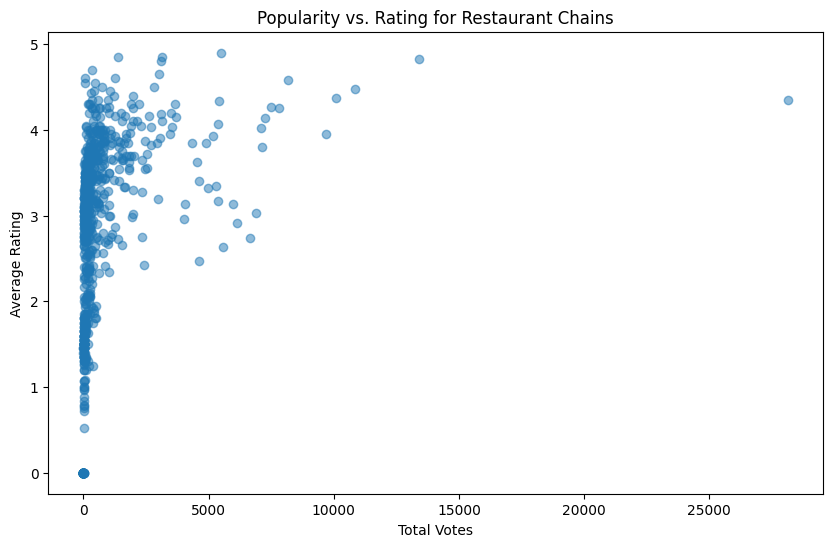

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(sorted_chain_analysis['Total Votes'], sorted_chain_analysis['Average Rating'], alpha=0.5)

plt.title('Popularity vs. Rating for Restaurant Chains')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')

plt.show()
